In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df =pd.read_csv("/content/mcdonalds.csv")

In [4]:
df.shape

(1453, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [8]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [9]:
df.isna().sum()

,0
yummy,0
convenient,0
spicy,0
fattening,0
greasy,0
fast,0
cheap,0
tasty,0
expensive,0
healthy,0


In [10]:

df["yummy"]= df["yummy"].replace({'Yes':1, 'No':0})
df["convenient"] = df["convenient"].replace({'Yes':1, 'No':0})
df["spicy"] = df["spicy"].replace({'Yes':1, 'No':0})
df["fattening"] = df["fattening"].replace({'Yes':1, 'No':0})
df["greasy"] = df["greasy"].replace({'Yes':1, 'No':0})
df["fast"] = df["fast"].replace({'Yes':1, 'No':0})
df["cheap"] = df["cheap"].replace({'Yes':1, 'No':0})
df["tasty"] = df["tasty"].replace({'Yes':1, 'No':0})
df["expensive"] = df["expensive"].replace({'Yes':1, 'No':0})
df["healthy"] = df["healthy"].replace({'Yes':1, 'No':0})
df["disgusting"] = df["disgusting"].replace({'Yes':1, 'No':0})

In [11]:
df1 = df.iloc[:,0:11]

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   yummy       1453 non-null   int64
 1   convenient  1453 non-null   int64
 2   spicy       1453 non-null   int64
 3   fattening   1453 non-null   int64
 4   greasy      1453 non-null   int64
 5   fast        1453 non-null   int64
 6   cheap       1453 non-null   int64
 7   tasty       1453 non-null   int64
 8   expensive   1453 non-null   int64
 9   healthy     1453 non-null   int64
 10  disgusting  1453 non-null   int64
dtypes: int64(11)
memory usage: 125.0 KB


<Axes: >

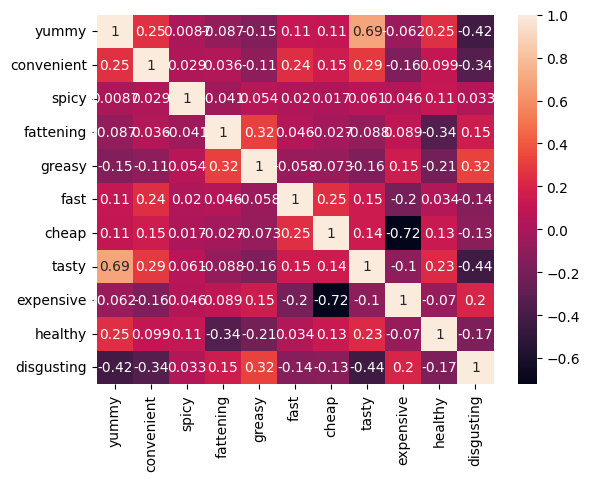

In [13]:
sns.heatmap(df1.corr(), annot=True)

In [14]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
scaled_df = scalar.fit_transform(df1)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,-0.704334,0.437016,-0.268698,-0.872074,1.521184,-0.470160,0.030969,0.687116,-0.367598,-0.321161,1.701170
1,0.467820,-0.364277,1.596835,-0.004835,-0.462385,0.449321,-0.087351,-0.446003,-0.221855,-0.191268,1.467681
2,-0.191986,-1.712949,0.339413,3.368168,1.266802,-0.148058,0.606634,0.668576,-1.377226,1.259300,-0.128530
3,0.116991,1.155122,1.003913,0.469589,-1.141750,0.857182,-0.015843,-0.390275,1.578539,-0.092189,-0.233201
4,0.034724,1.390267,-0.792275,0.473031,0.270488,0.847963,1.804085,0.700019,-1.630339,-0.092449,-0.033144


<Axes: xlabel='PCA2', ylabel='PCA3'>

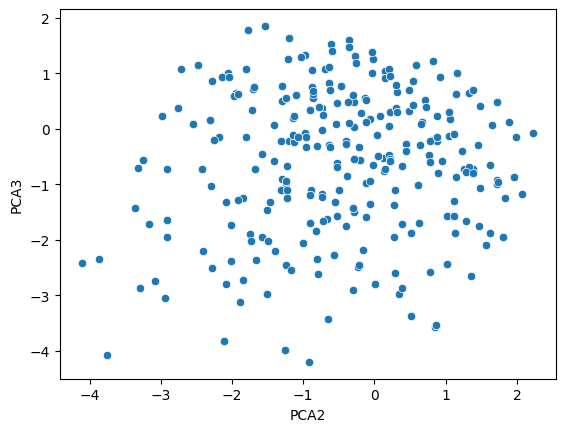

In [16]:
sns.scatterplot(data=pca_df, x='PCA2', y='PCA3')

In [17]:
from sklearn.cluster import KMeans

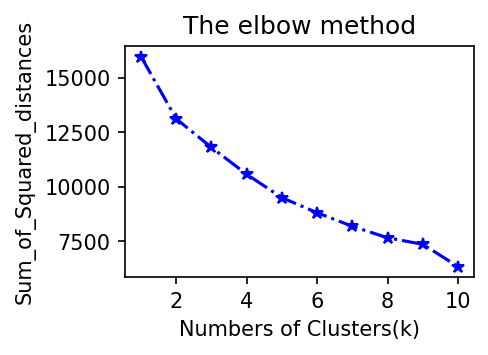

In [18]:
Sum_of_Squared_distances = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(scaled_df)
    Sum_of_Squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(3,2), dpi=150)
plt.plot(range(1, 11), Sum_of_Squared_distances, 'b*-.')
plt.title('The elbow method')
plt.xlabel('Numbers of Clusters(k)')
plt.ylabel('Sum_of_Squared_distances')
plt.show()

In [19]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

In [20]:
pca_df_kmeans.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,cluster
0,-0.704334,0.437016,-0.268698,-0.872074,1.521184,-0.470160,0.030969,0.687116,-0.367598,-0.321161,1.701170,0
1,0.467820,-0.364277,1.596835,-0.004835,-0.462385,0.449321,-0.087351,-0.446003,-0.221855,-0.191268,1.467681,3
2,-0.191986,-1.712949,0.339413,3.368168,1.266802,-0.148058,0.606634,0.668576,-1.377226,1.259300,-0.128530,0
3,0.116991,1.155122,1.003913,0.469589,-1.141750,0.857182,-0.015843,-0.390275,1.578539,-0.092189,-0.233201,3
4,0.034724,1.390267,-0.792275,0.473031,0.270488,0.847963,1.804085,0.700019,-1.630339,-0.092449,-0.033144,3


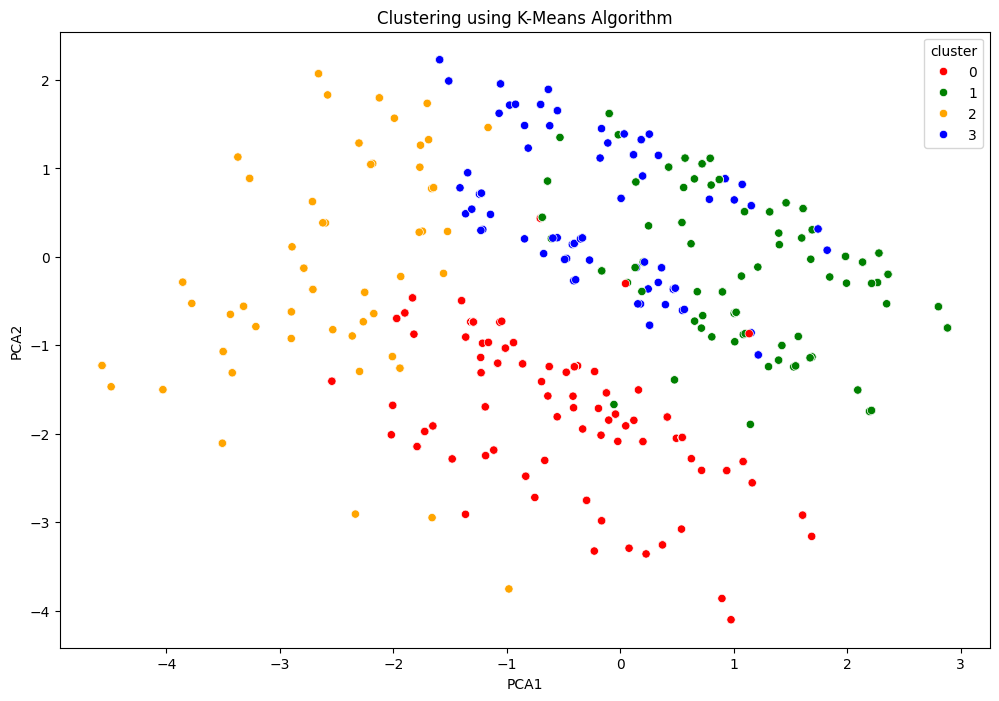

In [21]:
plt.figure(figsize=(12,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','orange','blue'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [22]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans1= pd.concat([df1,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_df_kmeans1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2
1,1,1,0,1,1,1,1,1,1,0,0,1
2,0,1,1,1,1,1,0,1,1,1,0,0
3,1,1,0,1,1,1,1,1,0,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,2


In [23]:
cluster_1_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==0]
cluster_1_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
2,0,1,1,1,1,1,0,1,1,1,0,0
6,1,1,1,1,0,1,0,1,1,1,0,0
22,1,1,1,1,1,1,1,1,1,0,1,0
23,1,1,1,1,0,1,0,1,1,0,0,0
42,1,1,1,1,0,1,1,1,0,1,0,0


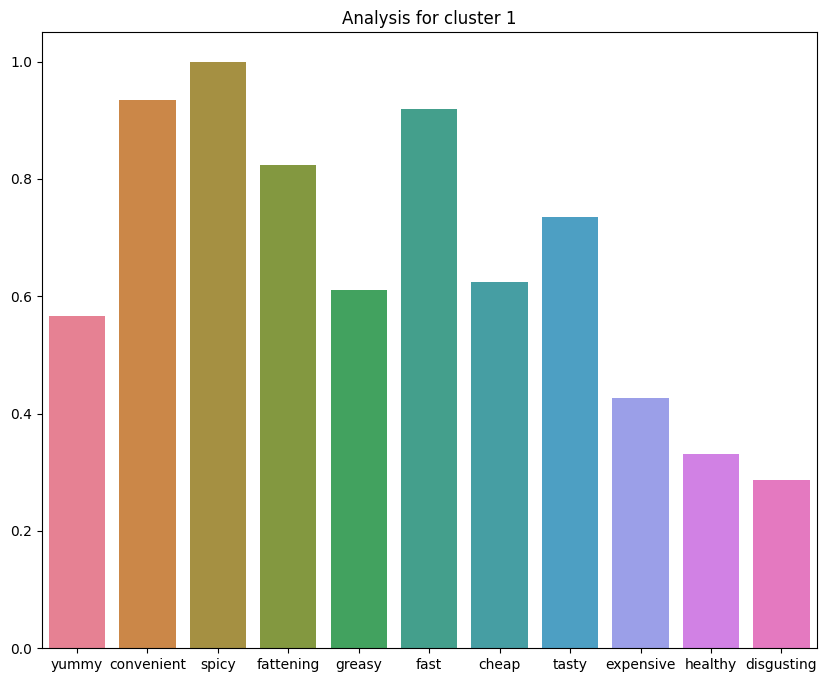

In [24]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=cluster_1_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('Analysis for cluster 1')
plt.show()

In [25]:
cluster_2_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==1]
cluster_2_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
1,1,1,0,1,1,1,1,1,1,0,0,1
3,1,1,0,1,1,1,1,1,0,0,1,1
5,1,1,0,1,0,1,1,1,0,0,0,1
7,1,1,0,1,1,1,1,1,0,0,0,1
15,1,1,0,1,0,1,1,1,0,0,0,1


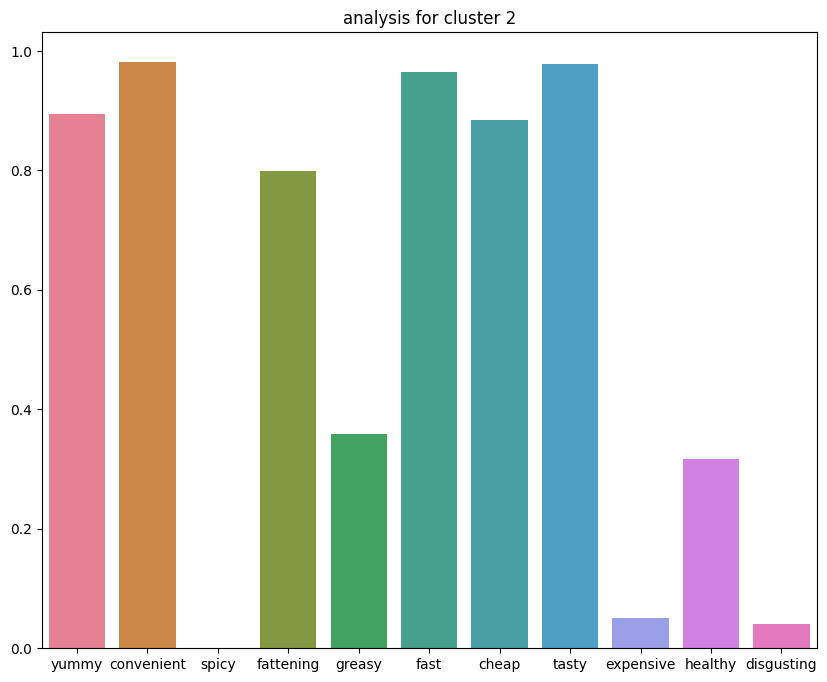

In [26]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=cluster_2_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 2')
plt.show()

In [27]:
cluster_3_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==2]
cluster_3_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2
4,0,1,0,1,1,1,1,0,0,1,0,2
10,0,1,0,1,0,1,1,0,0,0,1,2
12,0,1,0,1,0,1,1,0,0,0,0,2
18,0,0,0,1,1,1,1,0,1,0,1,2


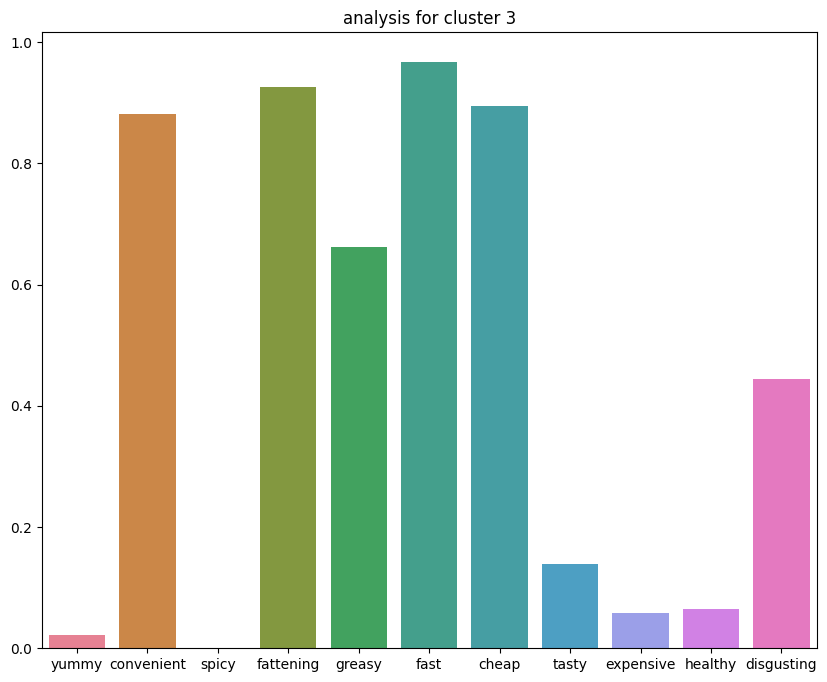

In [28]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=cluster_3_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 3')
plt.show()

In [29]:
cluster_4_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==3]
cluster_4_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
8,0,0,0,1,1,0,0,0,1,0,1,3
9,1,1,0,1,1,1,0,1,1,0,0,3
11,1,1,0,1,1,1,0,1,1,0,1,3
13,1,1,0,1,0,1,0,1,1,1,0,3
14,0,1,0,1,0,1,0,0,1,0,0,3


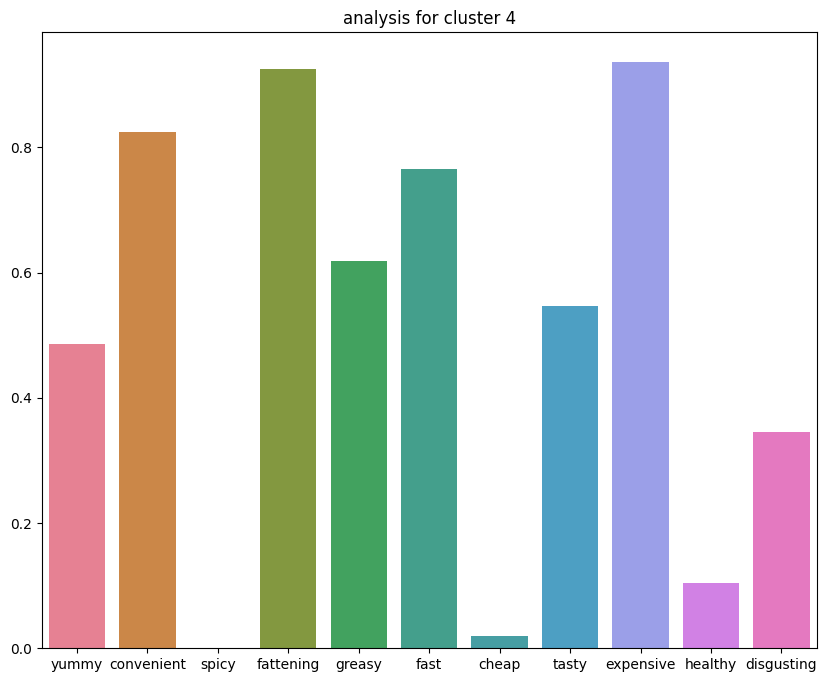

In [30]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=cluster_4_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 4')
plt.show()

In [31]:
df_new= pd.concat([df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,2
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,1
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,2


In [32]:
df_new["VisitFrequency"]= df_new["VisitFrequency"].replace({'Never':0, 'Once a year':1, 'Every three months':2, 'Once a month':3, 'Once a week':4, 'More than once a week':5,})

In [33]:
df_new

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,2,Female,2
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,2,Female,1
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,2,Female,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,4,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,3,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,1,Male,3
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,4,Female,1
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,3,Female,3
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,2,Male,1


In [34]:
df_new["Like"]= df_new["Like"].replace({'I hate it!-5':0, '-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})
df_new["Gender"]= df_new["Gender"].replace({'Female':0, 'Male':1})

In [35]:
df_new.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2,61,2,0,2
1,1,1,0,1,1,1,1,1,1,0,0,7,51,2,0,1
2,0,1,1,1,1,1,0,1,1,1,0,6,62,2,0,0
3,1,1,0,1,1,1,1,1,0,0,1,9,69,4,0,1
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,2


In [36]:
from sklearn.model_selection import train_test_split

X = df_new.drop(['cluster'],axis=1)
y= df_new[['cluster']]

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [37]:
X_test

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1207,1,1,0,1,1,1,0,1,1,0,0,10,19,4,0
1397,0,1,1,0,0,1,0,1,0,0,0,9,62,3,0
253,1,1,0,1,1,1,0,1,1,0,0,10,31,4,0
915,1,1,0,1,0,1,1,1,0,0,0,8,64,3,1
1155,1,1,0,1,0,1,1,1,0,0,0,6,41,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,1,1,0,1,0,1,1,0,0,0,0,6,30,4,1
1085,0,1,0,1,1,1,1,1,0,0,0,3,18,1,1
1307,0,0,1,1,1,0,1,0,0,1,1,0,66,1,1
149,1,1,0,1,1,1,0,1,1,0,0,5,45,3,1


In [38]:
X_train

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
770,1,1,0,1,0,1,1,1,0,0,0,8,53,2,0
918,1,1,0,1,1,1,1,1,0,0,1,8,30,2,0
148,0,1,0,1,1,1,0,0,1,0,1,1,39,1,0
216,0,0,0,1,1,0,1,0,0,0,1,0,56,1,0
153,1,1,0,1,0,1,1,1,0,0,0,10,22,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,1,1,0,1,0,1,0,1,0,0,0,9,44,3,0
1157,1,1,0,1,0,1,1,1,0,0,0,10,29,3,0
1365,0,1,0,1,0,1,1,0,0,0,0,5,61,2,1
1290,1,1,0,1,0,1,0,1,1,0,0,5,37,3,0


In [39]:
y_test

,cluster
1207,3
1397,0
253,3
915,1
1155,1
...,...
551,1
1085,2
1307,0
149,3


In [40]:
y_train

,cluster
770,1
918,1
148,3
216,2
153,1
...,...
841,1
1157,1
1365,2
1290,3


In [41]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

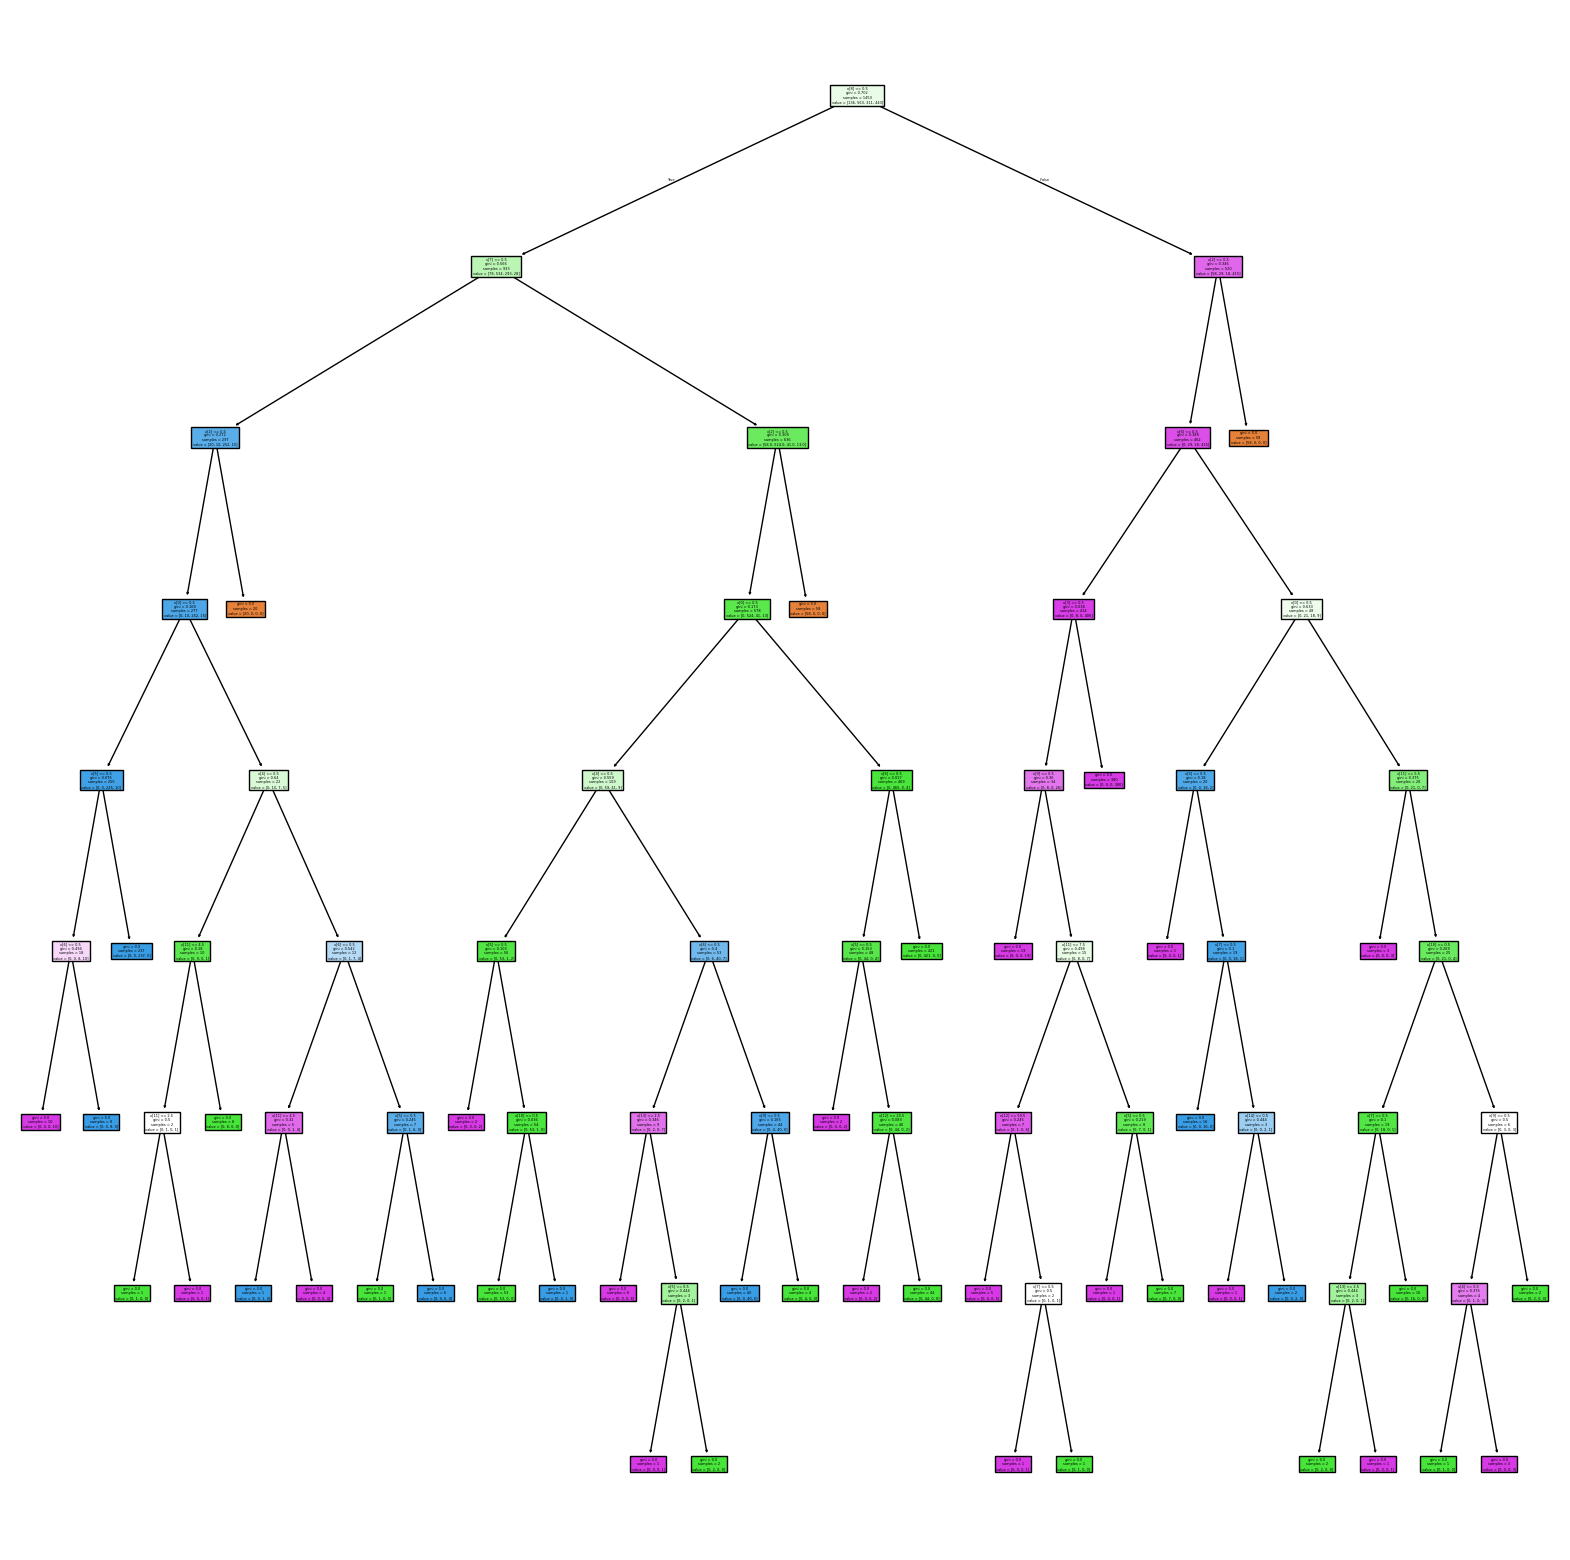

In [42]:
from sklearn import tree
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf, filled=True)